# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Hilal Rosyid Putra
- **Email:** hilalrosyidputra@gmail.com
- **ID Dicoding:** hilalrp

## Menentukan Pertanyaan Bisnis

- Bagaimana hubungan antara musim (season) dan jumlah sewa sepeda (cnt) harian? Musim mana yang menjadi peak-season sewa sepeda?
- Bagaimana tren jumlah sewa sepeda (cnt) berdasarkan waktu, seperti bulan (mnth) atau jam (hr)?
- Bagaimana hubungan cuaca (weathersit) terhadap jumlah sewa sepeda (cnt)?
- Bagaimana cara meningkatkan jumlah sewa sepeda yang digunakan oleh pengguna casual pada weekdays?

## Import Semua Packages/Library yang Digunakan

In [55]:
#%pip install seaborn

In [56]:
#%pip install plotly

In [57]:
#%pip install nbformat --upgrade


In [58]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

## Data Wrangling

### Gathering Data

In [59]:
day_df = pd.read_csv('D:/Downloads/Proyek_Analisis_Data/Bike-sharing-dataset/day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [60]:
hour_df = pd.read_csv('D:/Downloads/Proyek_Analisis_Data/Bike-sharing-dataset/hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

In [61]:
print('Data type in Dataframe day:')
print(day_df.info())

print('\nData type in Dataframe hour:')
print(hour_df.info())

Data type in Dataframe day:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None

Data type in Dataframe hour:
<class 'pandas.core.frame.Data

In [62]:
print('NULL value in Dataframe day:')
print(day_df.isnull().sum())

print('\nNULL value in Dataframe hour:')
print(hour_df.isnull().sum())

NULL value in Dataframe day:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

NULL value in Dataframe hour:
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [63]:
print('Duplicate value in Dataframe day:', day_df.duplicated().sum())
print('Duplicate value in Dataframe hour:', hour_df.duplicated().sum())

Duplicate value in Dataframe day: 0
Duplicate value in Dataframe hour: 0


In [64]:
day_df.describe(include='all')

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


In [65]:
hour_df.describe(include='all')

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


### Cleaning Data

In [66]:
# mengubah tipe data dteday dari int menjadi datetime
day_df["dteday"] = pd.to_datetime(day_df["dteday"])
hour_df["dteday"] = pd.to_datetime(hour_df["dteday"])

print('data type of day_df["dteday"] : ', day_df["dteday"].dtypes)
print('data type of hour_df["dteday"] : ', hour_df["dteday"].dtypes)

data type of day_df["dteday"] :  datetime64[ns]
data type of hour_df["dteday"] :  datetime64[ns]


# Exploratory Data Analysis (EDA)

### Explore number of unique values for each DataFrame

In [67]:
day_df.groupby(by="season").cnt.nunique().sort_values(ascending=False)

season
3    188
2    182
1    179
4    176
Name: cnt, dtype: int64

In [68]:
hour_df.groupby(by="season").cnt.nunique().sort_values(ascending=False)

season
3    760
2    721
4    690
1    482
Name: cnt, dtype: int64

In [69]:
day_df.groupby(by="weathersit").cnt.nunique().sort_values(ascending=False)

weathersit
1    451
2    243
3     21
Name: cnt, dtype: int64

In [70]:
hour_df.groupby(by="weathersit").cnt.nunique().sort_values(ascending=False)

weathersit
1    848
2    649
3    368
4      3
Name: cnt, dtype: int64

In [71]:
day_df.groupby(by="weekday").cnt.nunique().sort_values(ascending=False)

weekday
0    104
1    104
2    104
5    104
3    103
4    103
6    102
Name: cnt, dtype: int64

###Explore jumlah sewa sepeda pada weekdays dan pelanggan casual

In [72]:
day_df[(day_df['workingday'] == 1)].groupby('weekday')['casual'].sum()

weekday
1    54024
2    57403
3    54757
4    59945
5    77156
Name: casual, dtype: int64

###Eksplor distribusi data untuk tipe data numerik

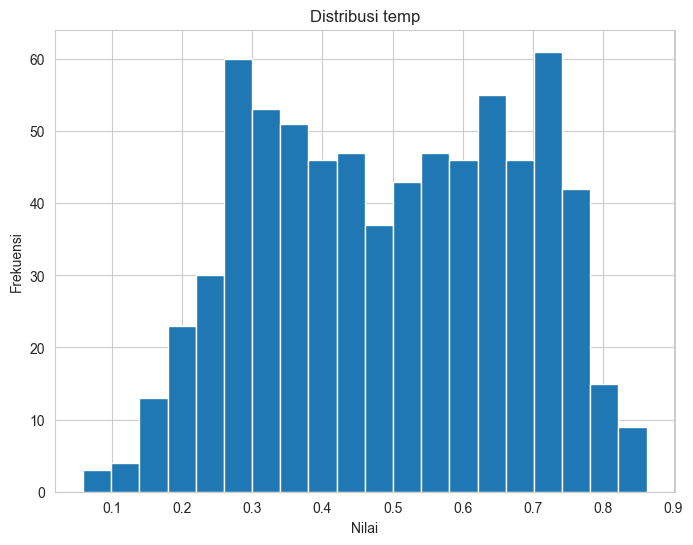

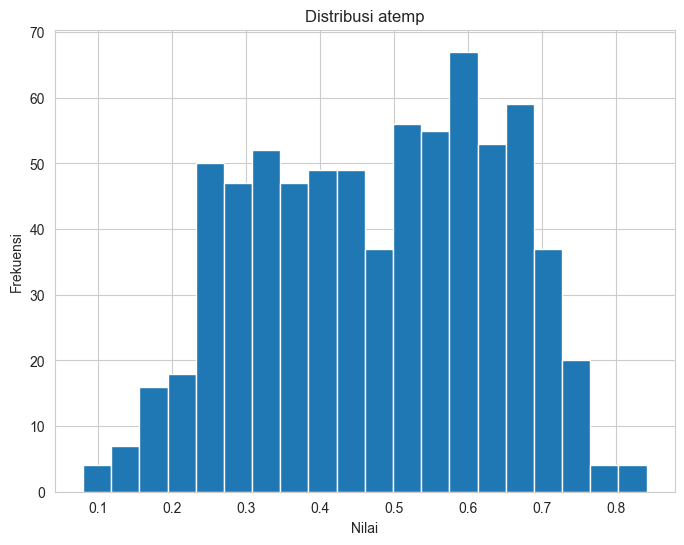

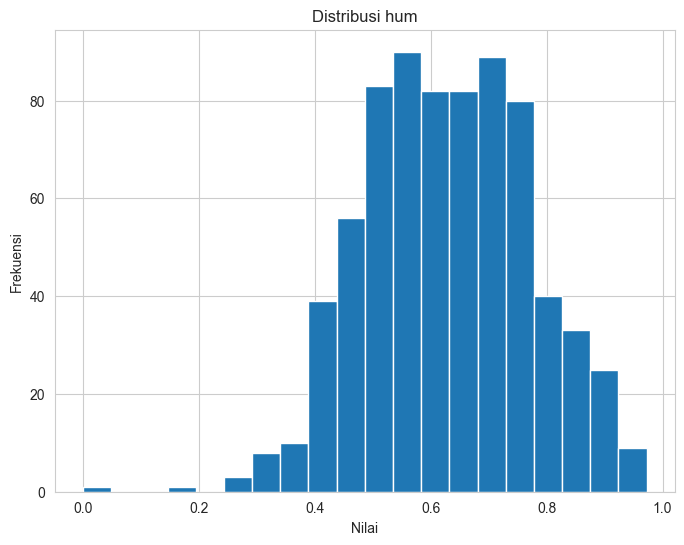

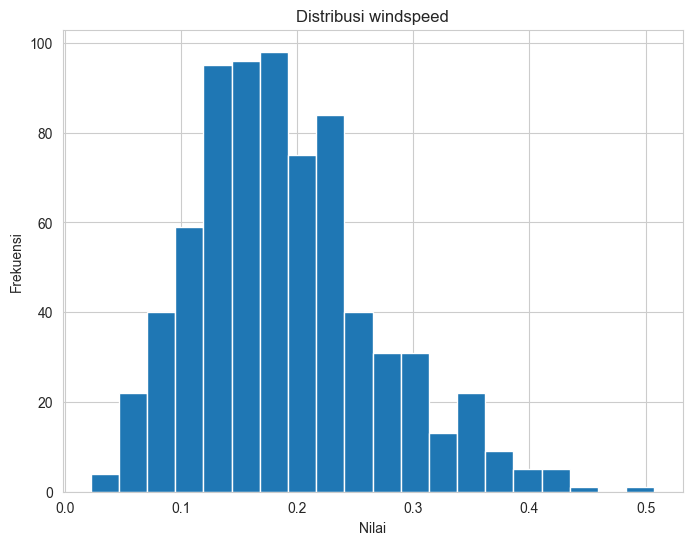

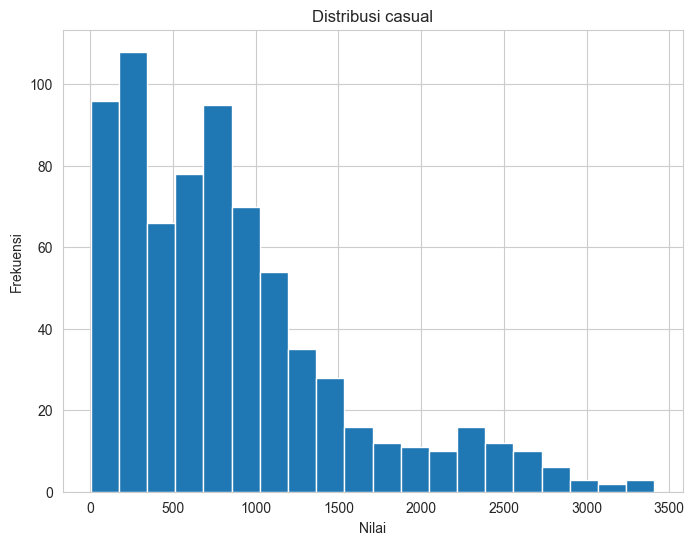

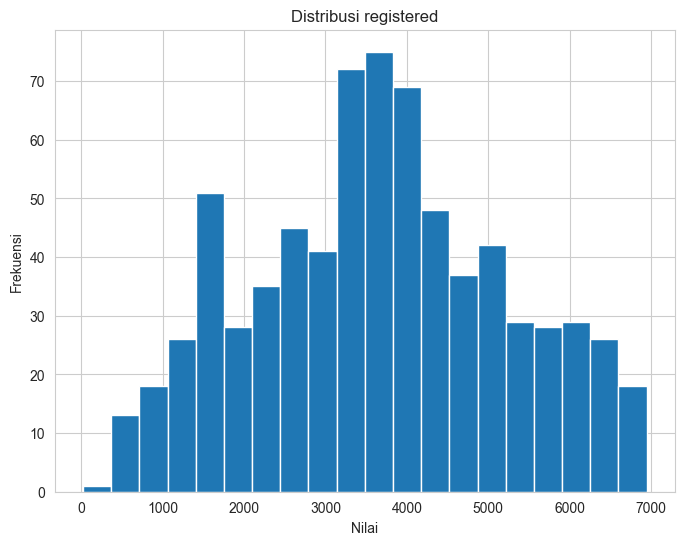

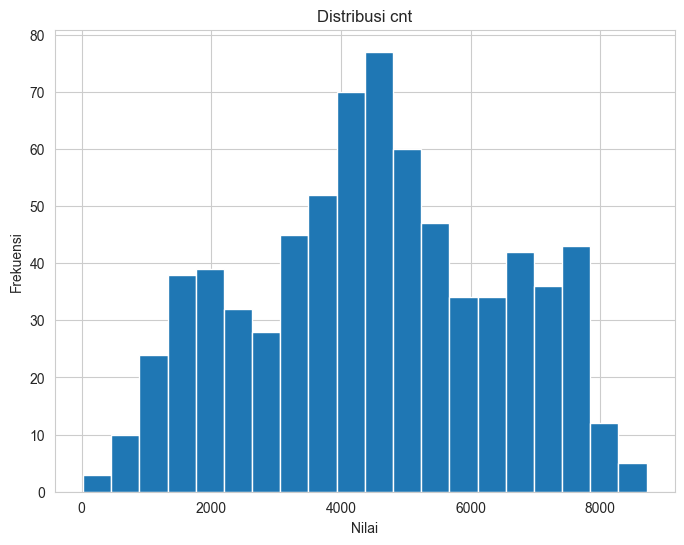

In [73]:
numeric_columns = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

for col in numeric_columns:
    plt.figure(figsize=(8, 6))
    plt.hist(day_df[col], bins=20)
    plt.xlabel('Nilai')
    plt.ylabel('Frekuensi')
    plt.title(f'Distribusi {col}')
    plt.grid(True)
    plt.show()


###Eksplor distribusi data untuk tipe data kategorik

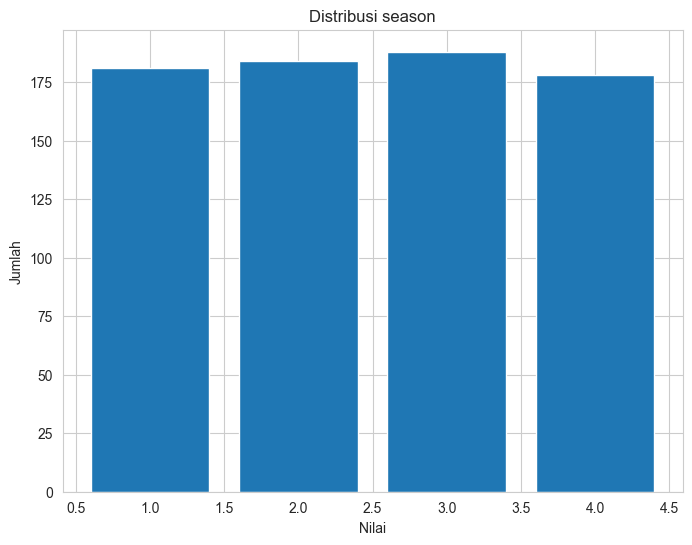

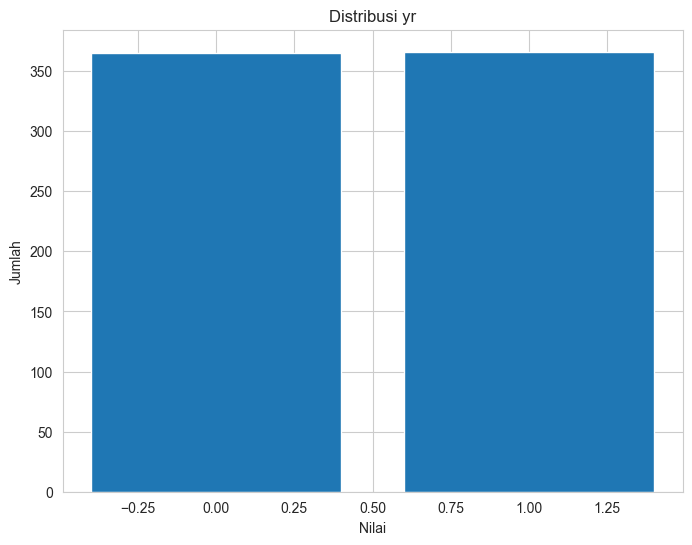

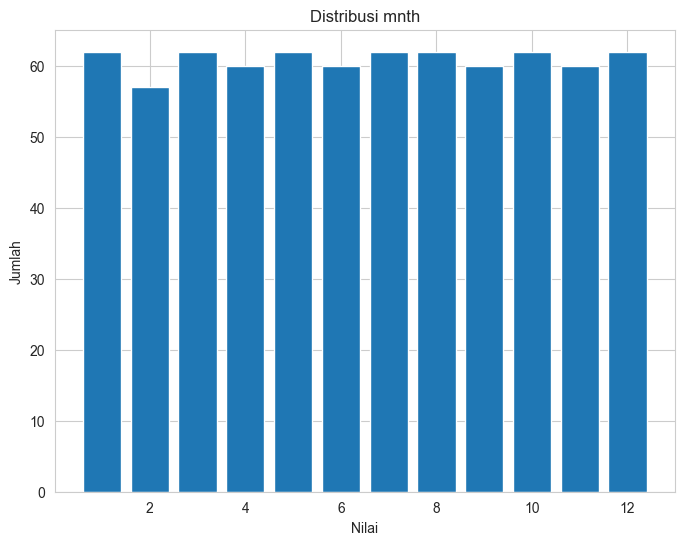

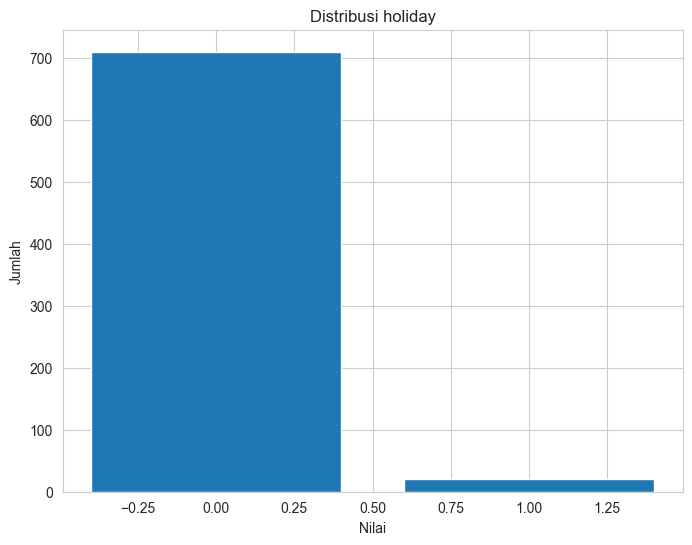

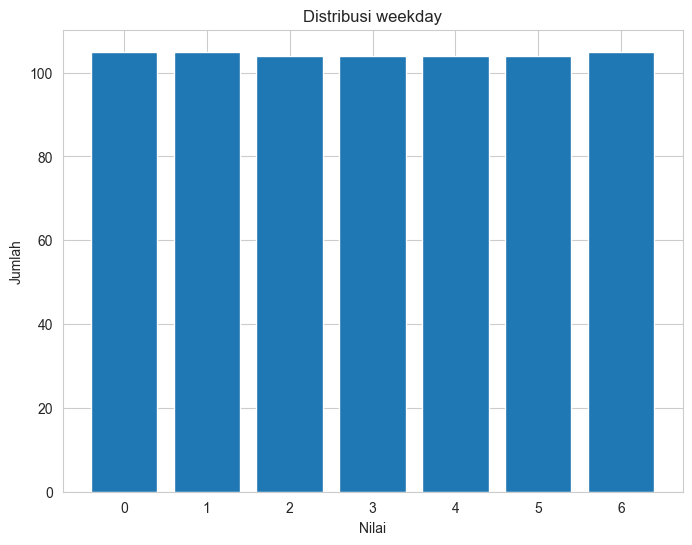

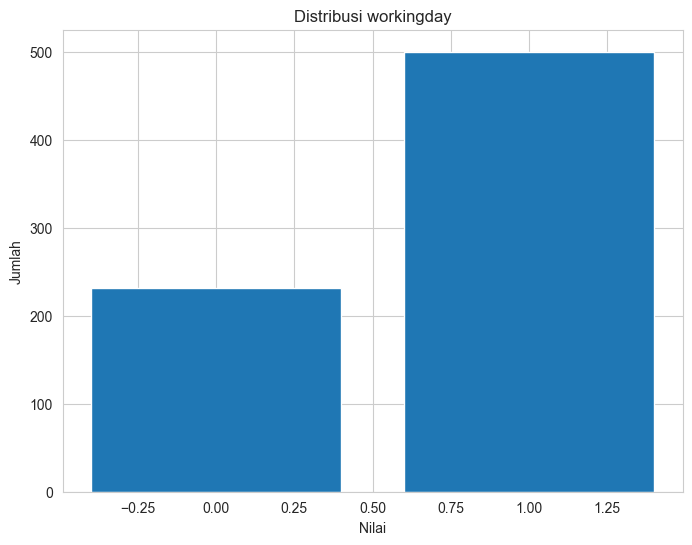

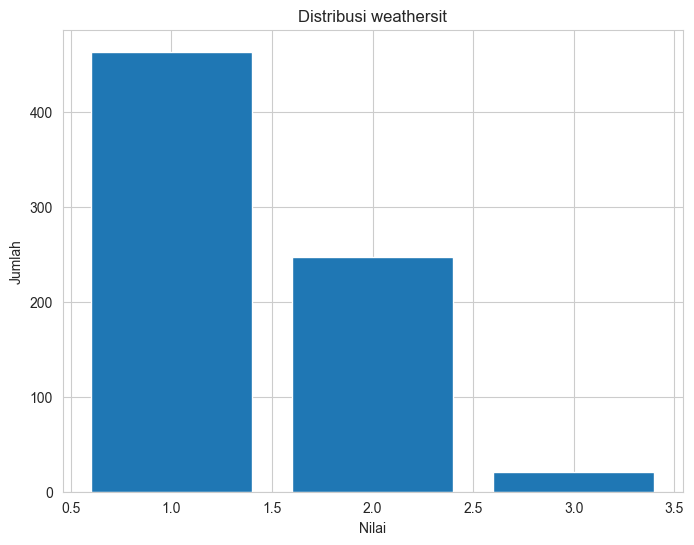

In [74]:
categorical_columns = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

for col in categorical_columns:
    plt.figure(figsize=(8, 6))
    plt.bar(day_df[col].value_counts().index, day_df[col].value_counts().values)
    plt.xlabel('Nilai')
    plt.ylabel('Jumlah')
    plt.title(f'Distribusi {col}')
    plt.show()


###Eksplor korelasi antar fitur

In [75]:
correlation_matrix_day = day_df.corr()
fig = px.imshow(correlation_matrix_day)
fig.update_layout(title="Korelasi antara Variabel Numerik Dataframe Day")
fig.show()

In [76]:
correlation_matrix_hour = hour_df.corr()
fig = px.imshow(correlation_matrix_hour)
fig.update_layout(title="Korelasi antara Variabel Numerik Dataframe Hour")
fig.show()

# Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana hubungan antara musim (season) dan jumlah sewa sepeda (cnt) harian? Musim mana yang menjadi *peak-season* sewa sepeda?


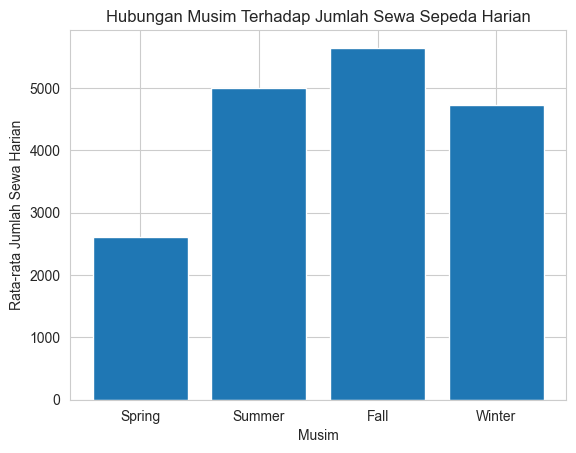

In [77]:
seasonal_data = day_df.groupby('season')['cnt'].mean()
season_names = ['Spring', 'Summer', 'Fall', 'Winter']
plt.bar(season_names, seasonal_data)
plt.xlabel('Musim')
plt.ylabel('Rata-rata Jumlah Sewa Harian')
plt.title('Hubungan Musim Terhadap Jumlah Sewa Sepeda Harian')
plt.show()

### Pertanyaan 2: Bagaimana tren jumlah sewa sepeda (cnt) berdasarkan waktu, seperti bulan (mnth) atau jam (hr)?


C:\Users\HP\AppData\Local\Temp\ipykernel_3208\271286944.py:3: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




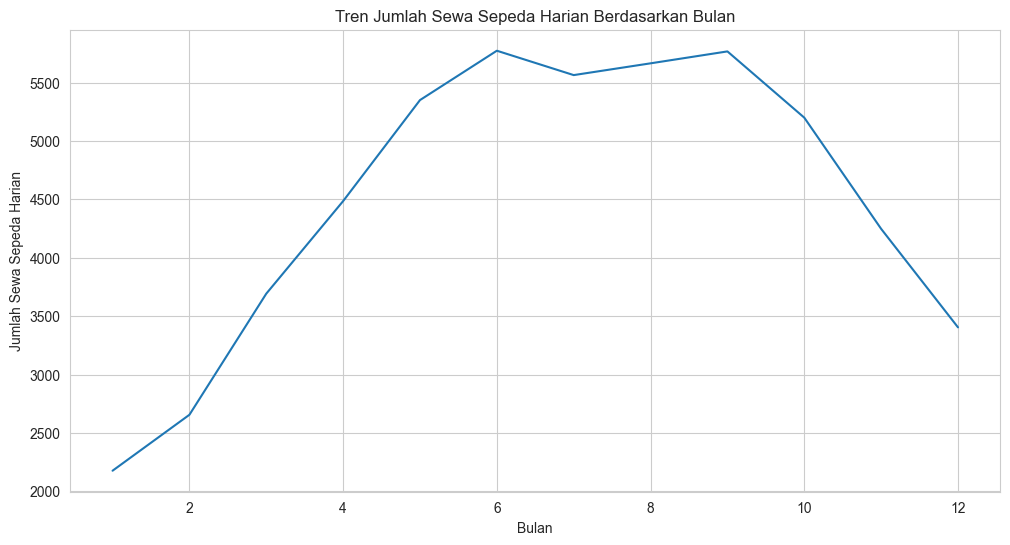

In [78]:
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))
sns.lineplot(x="mnth", y="cnt", data=day_df, ci=None)
plt.title("Tren Jumlah Sewa Sepeda Harian Berdasarkan Bulan")
plt.xlabel("Bulan")
plt.ylabel("Jumlah Sewa Sepeda Harian")
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_3208\2812394627.py:4: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




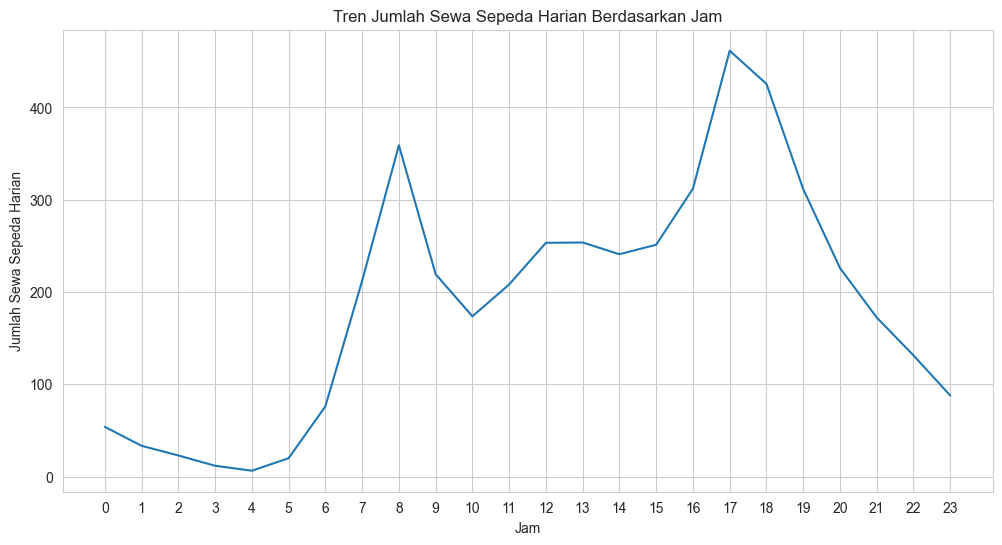

In [79]:
sns.set_style("whitegrid")

plt.figure(figsize=(12, 6))
sns.lineplot(x="hr", y="cnt", data=hour_df, ci=None)

plt.title("Tren Jumlah Sewa Sepeda Harian Berdasarkan Jam")
plt.xlabel("Jam")
plt.ylabel("Jumlah Sewa Sepeda Harian")

plt.xticks(range(0, 24))
plt.yticks()

plt.show()





### Pertanyaan 3: Bagaimana hubungan cuaca (weathersit) dengan jumlah sewa harian sepeda (cnt)?

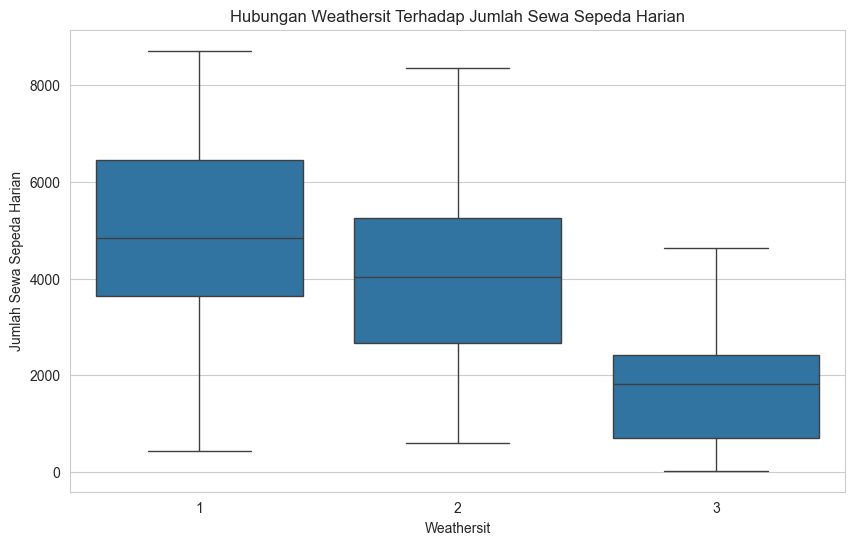

In [80]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="weathersit", y="cnt", data=day_df)
plt.title("Hubungan Weathersit Terhadap Jumlah Sewa Sepeda Harian")
plt.xlabel("Weathersit")
plt.ylabel("Jumlah Sewa Sepeda Harian")
plt.show()

### Pertanyaan 4 : Bagaimana cara meningkatkan jumlah sewa sepeda yang digunakan oleh pengguna casual pada weekdays?

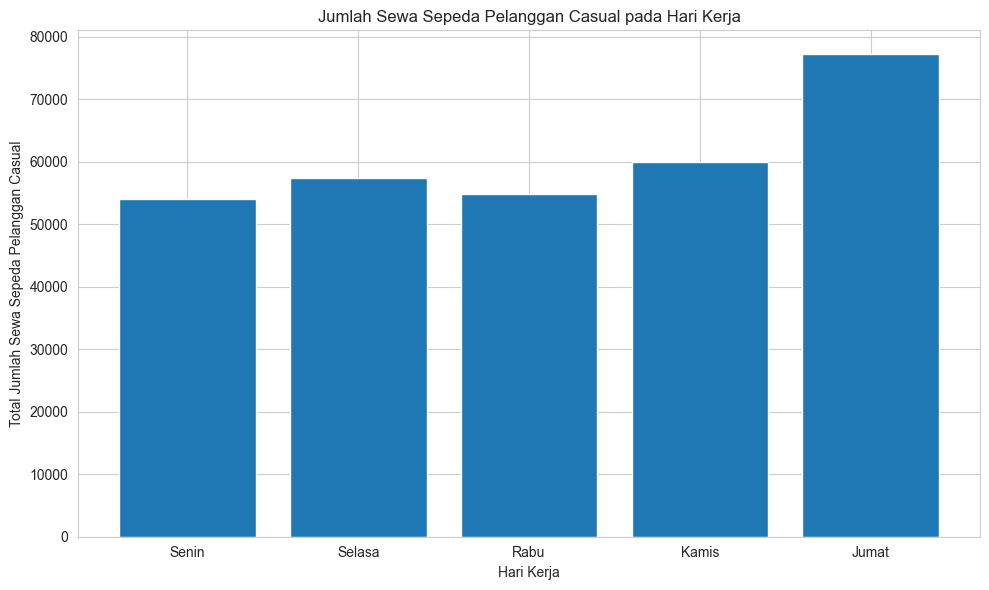

In [81]:
total_casual_by_weekday = day_df[(day_df['workingday'] == 1)].groupby('weekday')['casual'].sum()

labels = ['Senin', 'Selasa', 'Rabu', 'Kamis', 'Jumat']

plt.figure(figsize=(10, 6))
plt.bar(labels, total_casual_by_weekday)

plt.xlabel("Hari Kerja")
plt.ylabel("Total Jumlah Sewa Sepeda Pelanggan Casual")
plt.title("Jumlah Sewa Sepeda Pelanggan Casual pada Hari Kerja")

plt.tight_layout()
plt.show()


Strategi meningkatkan jumlah sewa sepeda yang digunakan oleh pengguna casual pada weekdays:

1. Menawarkan promosi khusus pada hari-hari dengan tingkat penggunaan yang rendah, seperti Senin dan Rabu, seperti diskon eksklusif atau penawaran khusus yang hanya berlaku pada hari kerja.
2. Memastikan akses mudah dan kondisi baik dari fasilitas penyewaan sepeda, seperti stasiun atau lokasi penyewaan, terutama selama hari kerja.
3. Intensifkan upaya pemasaran pada hari kerja, seperti melalui iklan online yang ditujukan kepada pengguna casual pada hari kerja.
4. Implementasikan program loyalitas atau penawaran diskon yang berkelanjutan bagi pengguna casual yang sering menyewa sepeda pada hari kerja.

# Conclusion

###Bagaimana hubungan antara musim (season) dan jumlah sewa sepeda (cnt) harian? Musim mana yang menjadi peak-season sewa sepeda?
Dari visualisasi di atas dapat disimpulkan bahwa, jumlah sewa sepeda paling banyak ada pada musim gugur (Fall) dan jumlah sewa sepeda paling sedikit ada pada musim semi (Spring). Musim yang menjadi peak season yakni musim gugur (Fall).

###Bagaimana tren jumlah sewa sepeda (cnt) berdasarkan waktu, seperti bulan (mnth) atau jam (hr)?
Berdasarkan bulan, terjadi peningkatan jumlah peminjaman sepeda pada bulan September dan Juni. Sementara itu, jika dilihat dari jamnya, peminjaman sepeda mengalami peningkatan yang signifikan pada pukul 8 pagi, kemudian mengalami penurunan. Jumlah penyewa mencapai puncaknya pada pukul 17, dan kemudian mengalami penurunan.

###Bagaimana hubungan cuaca (weathersit) terhadap jumlah sewa sepeda (cnt)?
Boxplot menunjukkan bahwa perubahan dalam kondisi cuaca secara jelas mempengaruhi perilaku pengguna sepeda. Secara lebih rinci, observasi menunjukkan bahwa pada kondisi cuaca tertentu, khususnya cuaca cerah atau sebagian berawan (weathersit 1), terdapat perbedaan yang signifikan dalam jumlah sepeda yang disewa dibandingkan weathersit lainnya. Jumlah sewa pada cuaca cerah atau sedikit berawan lebih tinggi dibandingkan dengan weathersit lainnya.

###Bagaimana cara meningkatkan jumlah sewa sepeda yang digunakan oleh pengguna casual pada weekdays?
Strategi meningkatkan jumlah sewa sepeda yang digunakan oleh pengguna casual pada weekdays:

1. Menawarkan promosi khusus pada hari-hari dengan tingkat penggunaan yang rendah, seperti Senin dan Rabu, seperti diskon eksklusif atau penawaran khusus yang hanya berlaku pada hari kerja.
2. Memastikan akses mudah dan kondisi baik dari fasilitas penyewaan sepeda, seperti stasiun atau lokasi penyewaan, terutama selama hari kerja.
3. Intensifkan upaya pemasaran pada hari kerja, seperti melalui iklan online yang ditujukan kepada pengguna casual pada hari kerja.
4. Implementasikan program loyalitas atau penawaran diskon yang berkelanjutan bagi pengguna casual yang sering menyewa sepeda pada hari kerja.

Peminjaman sepeda mencapai puncaknya pada hari Jumat, mengindikasikan peningkatan yang signifikan dalam penggunaan sepeda menjelang akhir pekan.